<a href="https://colab.research.google.com/github/sidharthh-a/kernel-functions-comparison/blob/main/KernelFunctionWorklet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

semeion dataset

In [ ]:
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import numpy as np

# Load the dataset
# Semeion data file has 256 features + 10 target columns (one-hot encoded digits)
data = np.loadtxt("/content/semeion.data")

# Features (first 256 columns)
X = data[:, :256]

# Labels: last 10 columns are one-hot encoded → convert to integer labels
y = np.argmax(data[:, 256:], axis=1)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# Kernels to test
kernels = ['linear', 'poly', 'rbf', 'sigmoid']

print("Kernel Performance on Semeion Handwritten Digit Dataset:\n")
best_kernel = None
best_acc = 0.0

for kernel in kernels:
    clf = svm.SVC(kernel=kernel, degree=3, gamma='scale', C=1.0)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print(f"{kernel:>7} kernel accuracy: {acc:.4f}")

    if acc > best_acc:
        best_acc = acc
        best_kernel = kernel

print("\nBest Kernel:", best_kernel, "with accuracy:", round(best_acc, 4))

Kernel Performance on Semeion Handwritten Digit Dataset:

 linear kernel accuracy: 0.9393
   poly kernel accuracy: 0.9582
    rbf kernel accuracy: 0.9540
sigmoid kernel accuracy: 0.8996

Best Kernel: poly with accuracy: 0.9582


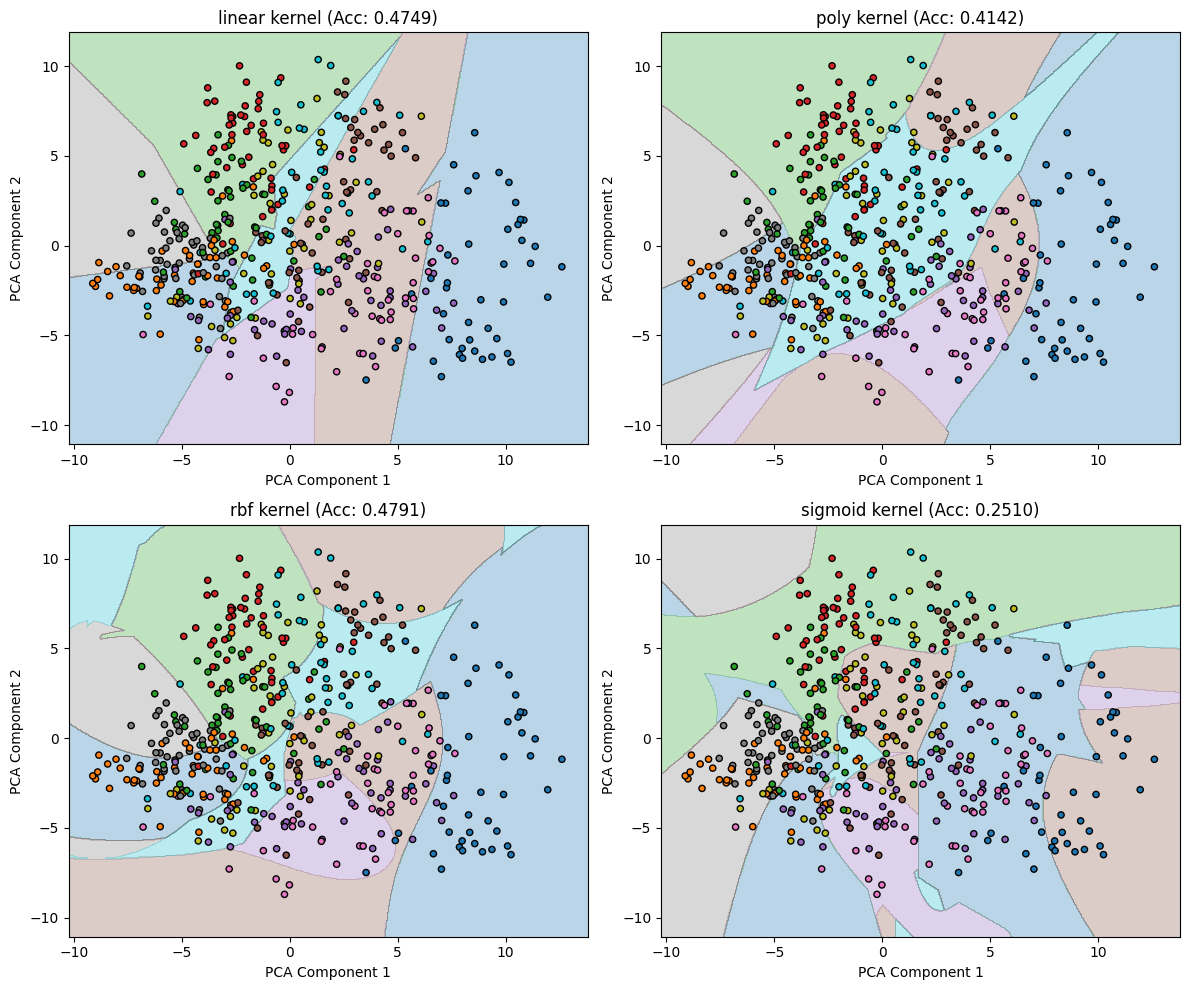

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score

# Load dataset
data = np.loadtxt("/content/semeion.data")

# First 256 columns = features
X = data[:, :256]

# Last 10 columns = one-hot labels → convert to integer labels
y = np.argmax(data[:, 256:], axis=1)

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Reduce to 2D with PCA
pca = PCA(n_components=2)
X_2d = pca.fit_transform(X_scaled)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X_2d, y, test_size=0.3, random_state=42, stratify=y
)

# Kernels to test
kernels = ['linear', 'poly', 'rbf', 'sigmoid']

# Create subplots
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
axes = axes.ravel()

for i, kernel in enumerate(kernels):
    clf = svm.SVC(kernel=kernel, degree=3, gamma='scale', C=1.0)
    clf.fit(X_train, y_train)
    acc = accuracy_score(y_test, clf.predict(X_test))

    # Create mesh grid for plotting
    x_min, x_max = X_2d[:, 0].min() - 1, X_2d[:, 0].max() + 1
    y_min, y_max = X_2d[:, 1].min() - 1, X_2d[:, 1].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 500),
                         np.linspace(y_min, y_max, 500))

    # Predict over grid
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Plot decision boundaries
    axes[i].contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.tab10)
    scatter = axes[i].scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=plt.cm.tab10, edgecolors='k', s=20)
    axes[i].set_title(f"{kernel} kernel (Acc: {acc:.4f})")
    axes[i].set_xlabel("PCA Component 1")
    axes[i].set_ylabel("PCA Component 2")

plt.tight_layout()
plt.show()



=== Semeion Dataset | Kernel: linear ===
Accuracy: 0.9331


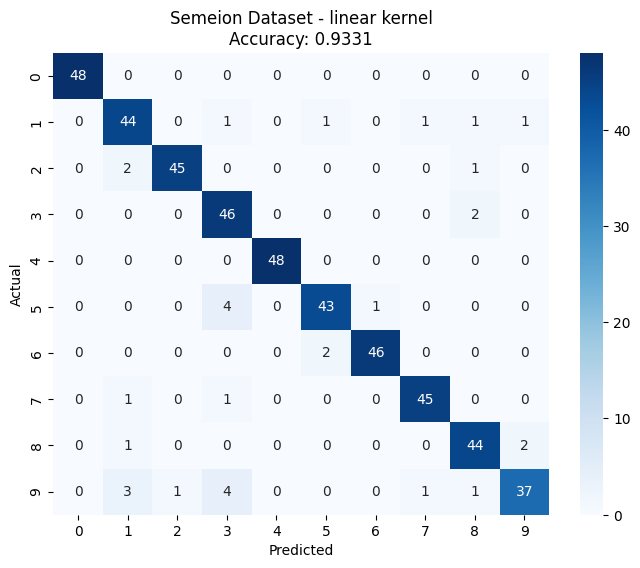


=== Semeion Dataset | Kernel: poly ===
Accuracy: 0.9561


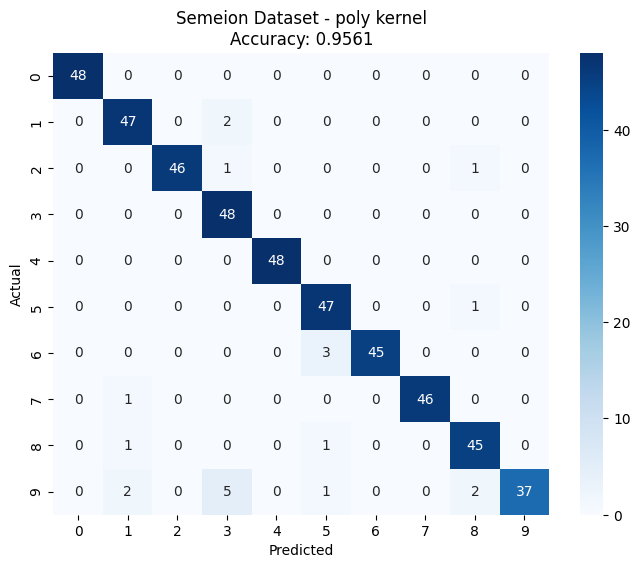


=== Semeion Dataset | Kernel: rbf ===
Accuracy: 0.9561


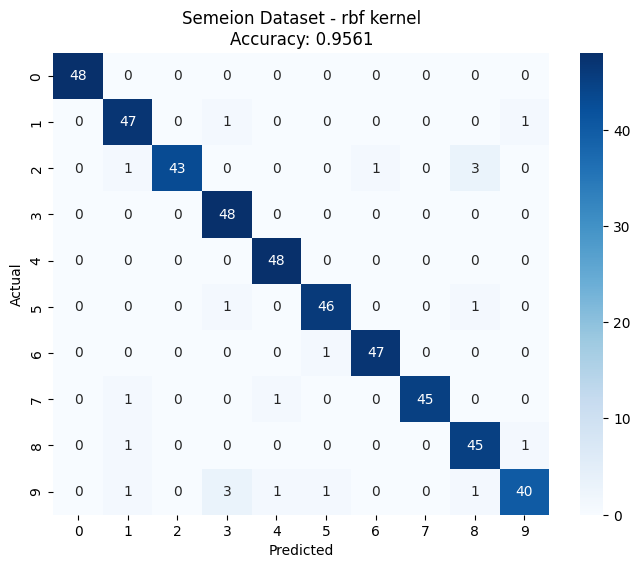


=== Semeion Dataset | Kernel: sigmoid ===
Accuracy: 0.9184


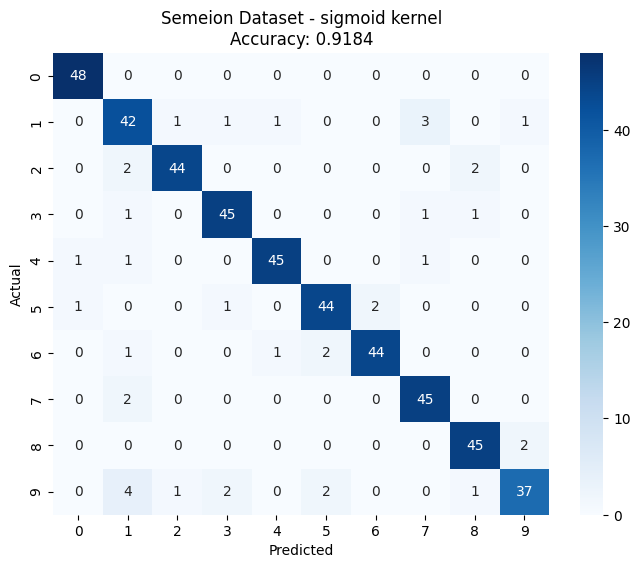

In [ ]:
import numpy as np
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Load Semeion dataset
data = np.loadtxt("/content/semeion.data")
X = data[:, :256]
y = np.argmax(data[:, 256:], axis=1)  # one-hot → integer labels

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.3, random_state=42, stratify=y
)

# Kernels to test
kernels = ['linear', 'poly', 'rbf', 'sigmoid']

for kernel in kernels:
    clf = svm.SVC(kernel=kernel, degree=3, gamma='scale', C=1.0)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)

    print(f"\n=== Semeion Dataset | Kernel: {kernel} ===")
    print(f"Accuracy: {acc:.4f}")

    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.title(f"Semeion Dataset - {kernel} kernel\nAccuracy: {acc:.4f}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

spambase dataset

In [ ]:
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import numpy as np

# Load Spambase dataset
# Last column is the label (1 = spam, 0 = not spam)
data = np.loadtxt("/content/spambase.data", delimiter=",")

X = data[:, :-1]  # Features
y = data[:, -1]   # Labels

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# Kernels to test
kernels = ['linear', 'poly', 'rbf', 'sigmoid']

print("Kernel Performance on Spambase Dataset:\n")
best_kernel = None
best_acc = 0.0

for kernel in kernels:
    clf = svm.SVC(kernel=kernel, degree=3, gamma='scale', C=1.0)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print(f"{kernel:>7} kernel accuracy: {acc:.4f}")

    if acc > best_acc:
        best_acc = acc
        best_kernel = kernel

print("\nBest Kernel:", best_kernel, "with accuracy:", round(best_acc, 4))



Kernel Performance on Spambase Dataset:

 linear kernel accuracy: 0.9269
   poly kernel accuracy: 0.6568
    rbf kernel accuracy: 0.7082
sigmoid kernel accuracy: 0.6104

Best Kernel: linear with accuracy: 0.9269



=== Spambase Dataset | Kernel: linear ===
Accuracy: 0.9276


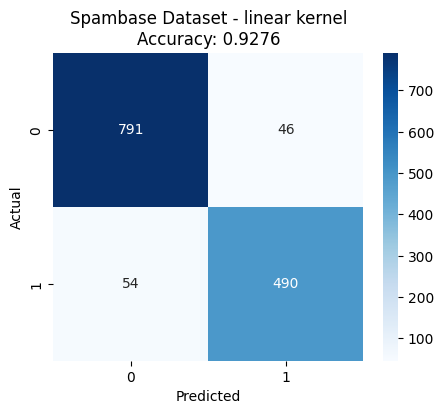


=== Spambase Dataset | Kernel: poly ===
Accuracy: 0.7705


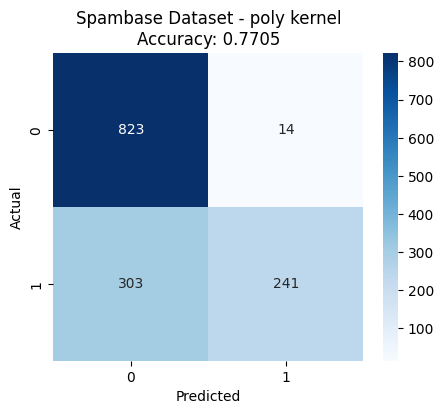


=== Spambase Dataset | Kernel: rbf ===
Accuracy: 0.9290


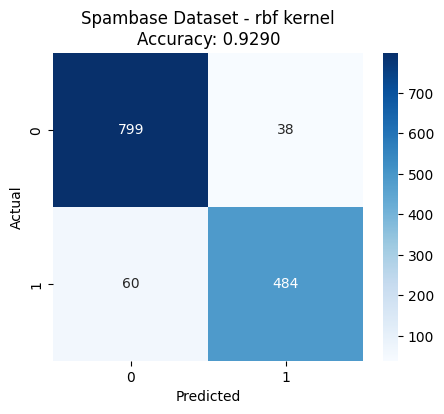


=== Spambase Dataset | Kernel: sigmoid ===
Accuracy: 0.8849


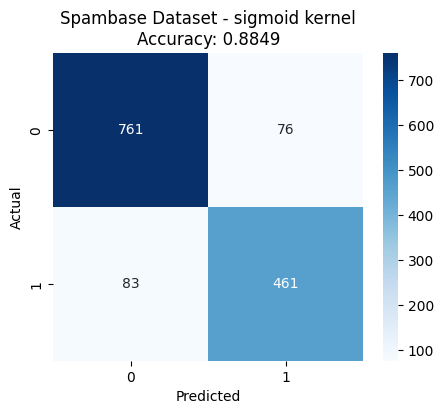

In [ ]:
import numpy as np
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Load Spambase dataset
data = np.loadtxt("/content/spambase.data", delimiter=",")
X = data[:, :-1]
y = data[:, -1]

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.3, random_state=42, stratify=y
)

# Kernels to test
kernels = ['linear', 'poly', 'rbf', 'sigmoid']

for kernel in kernels:
    clf = svm.SVC(kernel=kernel, degree=3, gamma='scale', C=1.0)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)

    print(f"\n=== Spambase Dataset | Kernel: {kernel} ===")
    print(f"Accuracy: {acc:.4f}")

    plt.figure(figsize=(5, 4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.title(f"Spambase Dataset - {kernel} kernel\nAccuracy: {acc:.4f}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

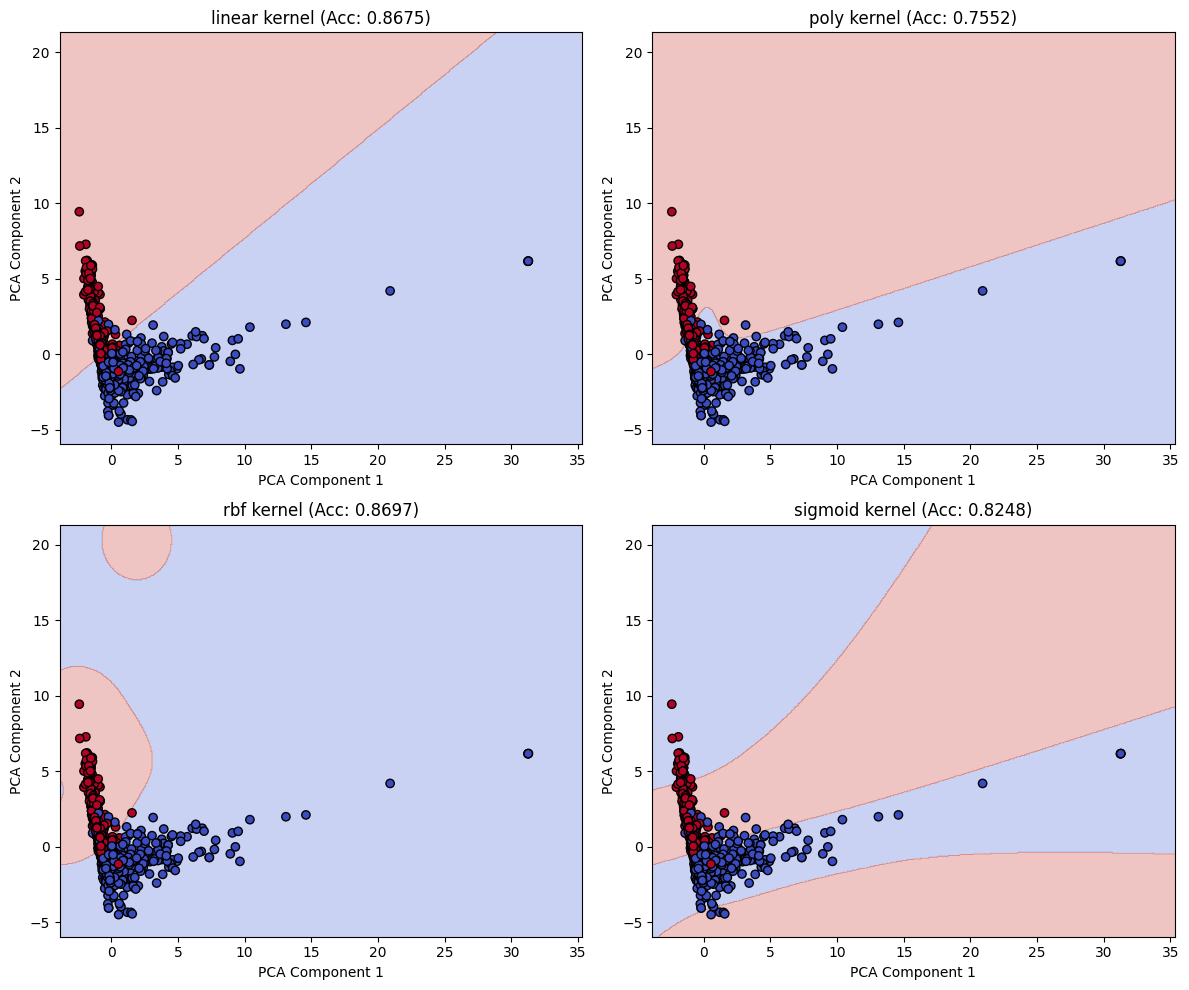

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score

# Load dataset
data = np.loadtxt("/content/spambase.data", delimiter=",")
X = data[:, :-1]
y = data[:, -1]

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Reduce to 2D for plotting
pca = PCA(n_components=2)
X_2d = pca.fit_transform(X_scaled)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X_2d, y, test_size=0.3, random_state=42, stratify=y
)

# Kernels to test
kernels = ['linear', 'poly', 'rbf', 'sigmoid']

# Plot setup
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
axes = axes.ravel()

for i, kernel in enumerate(kernels):
    clf = svm.SVC(kernel=kernel, degree=3, gamma='scale', C=1.0)
    clf.fit(X_train, y_train)
    acc = accuracy_score(y_test, clf.predict(X_test))

    # Create a mesh grid
    x_min, x_max = X_2d[:, 0].min() - 1, X_2d[:, 0].max() + 1
    y_min, y_max = X_2d[:, 1].min() - 1, X_2d[:, 1].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 500),
                         np.linspace(y_min, y_max, 500))

    # Predict over the grid
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Plot decision boundary
    axes[i].contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.coolwarm)
    scatter = axes[i].scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=plt.cm.coolwarm, edgecolors='k')
    axes[i].set_title(f"{kernel} kernel (Acc: {acc:.4f})")
    axes[i].set_xlabel("PCA Component 1")
    axes[i].set_ylabel("PCA Component 2")

plt.tight_layout()
plt.show()
